In [1]:
# Computer Vision Image analysis

In [2]:
import requests
from io import BytesIO
from PIL import Image

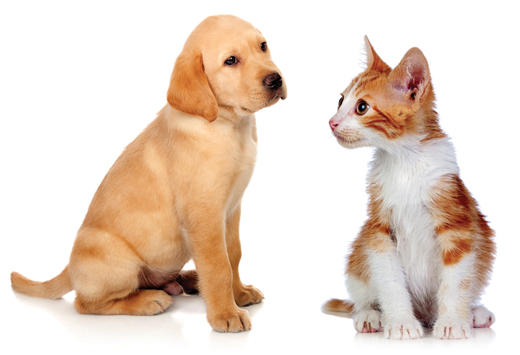

In [15]:
image_url = 'https://menu.mt.co.kr/moneyweek/thumb/2017/05/17/06/2017051709058028746_1.jpg'
#response = requests.get(image_url)
#img = BytesIO(response.content)
#image = Image.open(img)
#image


# 한줄로 표현 가능
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [16]:
# 필요한 값들을 준비한다.
key = '67a50330c4a243ad8b93480002b89459'
endpoint = 'https://labuser60computervision2.cognitiveservices.azure.com/' + 'vision/v2.0/'

In [17]:
analyze_endpoint = endpoint + 'analyze'
detect_endpoint = endpoint + 'detect'

In [18]:
header = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [19]:
response = requests.post(analyze_endpoint,
             headers=header,
             params=params,
             json=data)

In [20]:
result = response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': 'A94B22',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'indoor',
   'animal',
   'brown',
   'sitting',
   'mammal',
   'looking',
   'front',
   'orange',
   'standing',
   'cat',
   'water',
   'playing',
   'laying'],
  'captions': [{'text': 'a dog looking at the camera',
    'confidence': 0.9190374948538722}]},
 'requestId': '031b176b-7974-43de-8b9f-058aefc824fc',
 'metadata': {'height': 355, 'width': 520, 'format': 'Jpeg'}}

In [24]:
result['description']['captions'][0]['text']

'a dog looking at the camera'

In [25]:
# Object Detection

headers = {'Ocp-Apim-Subscription-Key': key}
params = {}
data = {'url':image_url}

In [27]:
response = requests.post(detect_endpoint,
                        headers=headers,
                        params=params,
                        json=data)

In [28]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 10, 'y': 20, 'w': 280, 'h': 309},
   'object': 'golden retriever',
   'confidence': 0.517,
   'parent': {'object': 'retriever',
    'confidence': 0.905,
    'parent': {'object': 'dog',
     'confidence': 0.921,
     'parent': {'object': 'mammal',
      'confidence': 0.932,
      'parent': {'object': 'animal', 'confidence': 0.932}}}}},
  {'rectangle': {'x': 324, 'y': 30, 'w': 174, 'h': 318},
   'object': 'cat',
   'confidence': 0.716,
   'parent': {'object': 'mammal',
    'confidence': 0.889,
    'parent': {'object': 'animal', 'confidence': 0.89}}}],
 'requestId': 'c2fbcdf3-80de-4841-ab0a-76fc700aa2dc',
 'metadata': {'height': 355, 'width': 520, 'format': 'Jpeg'}}

In [40]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [48]:
def MakeBox(res):
    objects = res['objects']
    for obj in objects:
        rect = obj['rectangle']
        print(rect)
        x = rect['x']
        y = rect['y']        
        w = rect['w']        
        h = rect['h']
        
        draw.rectangle(((x,y),(x+w,y+h)), outline='red')
        
        objectName = obj['object']
        draw.text((x,y), objectName, fill = 'red')

In [49]:
MakeBox(result)

{'x': 10, 'y': 20, 'w': 280, 'h': 309}
{'x': 324, 'y': 30, 'w': 174, 'h': 318}


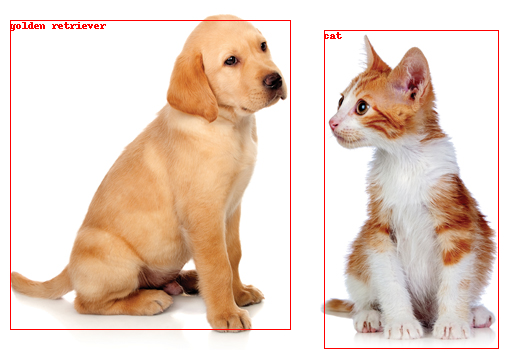

In [50]:
image

In [51]:
ocr_endpoint = endpoint + 'ocr'

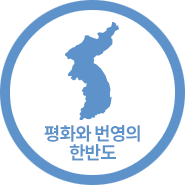

In [52]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"

image = Image.open(BytesIO(requests.get(image_url).content))

image

In [53]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'language':'ko','detectOrientation':'true'} # unk를 쓰면 auto detect가 된다.
data = {'url':image_url}

In [54]:
response = requests.post(ocr_endpoint,
                        headers=headers,
                        params=params,
                        json=data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [59]:
for reg in result['regions']:
    for line in reg['lines']:
        for word in line['words']:
            print(word['text'])

평화와
번영의
한반도
